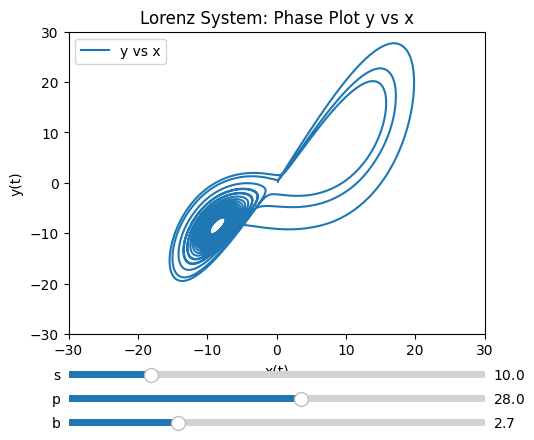

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.widgets import Slider
import math

#define constants
s = 10
p = 28
b = 8/3

def update(val):
    s = slider_s.val
    p = slider_p.val
    b = slider_b.val

    # Solve the Lorenz system
    solution = solve_ivp(lorenz, (0, 20), [x0, y0, z0], t_eval=t_eval, args=(s, p, b))

    # Update the plot
    line.set_xdata(solution.y[0])
    line.set_ydata(solution.y[1])
    fig.canvas.draw_idle()




#initialize variables
x0 = 0.2
y0 = 0.2
z0 = 0.2

#define ODEs

def lorenz(t,v):
    x,y,z = v
    dxdt= s*(y-x)
    dydt= x*(p-z) -y
    dzdt= x*y - b*z
    return [dxdt, dydt, dzdt]

t_eval = np.linspace(0,20,5000)

solution = solve_ivp(lorenz,(0,20), [x0,y0,z0],t_eval=t_eval)

plt.plot(solution.y[2],solution.y[1], label='y vs x')

# Add sliders for s, p, b
ax_s = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_p = plt.axes([0.25, 0.1, 0.65, 0.03])
ax_b = plt.axes([0.25, 0.05, 0.65, 0.03])

slider_s = Slider(ax_s, 's', 0.1, 50.0, valinit=s, valstep=0.1)
slider_p = Slider(ax_p, 'p', 0.1, 50.0, valinit=p, valstep=0.1)
slider_b = Slider(ax_b, 'b', 0.1, 10.0, valinit=b, valstep=0.1)

# Connect sliders to update function
slider_s.on_changed(update)
slider_p.on_changed(update)
slider_b.on_changed(update)

# Initial plot
update(None)
plt.show()